Acknowledgement: This code was initially inspired by the lab "COMP34212_Lab2b_Keras_CNN_CIFAR_2025" before undergoing significant changes.

# Setup

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import utils
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout, SpatialDropout2D
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Input, Add
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.callbacks import Callback, LearningRateScheduler, ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers.schedules import CosineDecay



In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

print('Libraries imported.')

Libraries imported.


# Data Preperation

In [ ]:



cifar100_fine_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

cifar100_coarse_labels = [
    'aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables',
    'household electrical devices', 'household furniture', 'insects', 'large carnivores',
    'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores',
    'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals',
    'trees', 'vehicles 1', 'vehicles 2'
]


fine_to_coarse_mapping = {
    0: 4, 1: 1, 2: 14, 3: 8, 4: 0, 5: 6, 6: 7, 7: 7,
    8: 18, 9: 3, 10: 3, 11: 14, 12: 9, 13: 18, 14: 7, 15: 11,
    16: 3, 17: 9, 18: 7, 19: 11, 20: 6, 21: 11, 22: 5, 23: 10,
    24: 7, 25: 6, 26: 13, 27: 15, 28: 3, 29: 15, 30: 0, 31: 11,
    32: 1, 33: 10, 34: 12, 35: 14, 36: 16, 37: 9, 38: 11, 39: 5,
    40: 5, 41: 19, 42: 8, 43: 8, 44: 15, 45: 13, 46: 14, 47: 17,
    48: 18, 49: 10, 50: 16, 51: 4, 52: 17, 53: 4, 54: 2, 55: 0,
    56: 17, 57: 4, 58: 18, 59: 17, 60: 10, 61: 3, 62: 2, 63: 12,
    64: 12, 65: 16, 66: 12, 67: 1, 68: 9, 69: 19, 70: 2, 71: 10,
    72: 0, 73: 1, 74: 16, 75: 12, 76: 9, 77: 13, 78: 15, 79: 13,
    80: 16, 81: 18, 82: 2, 83: 4, 84: 6, 85: 19, 86: 5, 87: 5,
    88: 8, 89: 19, 90: 18, 91: 1, 92: 2, 93: 15, 94: 6, 95: 0,
    96: 17, 97: 8, 98: 14, 99: 13
}

In [ ]:

BATCH_SIZE = 256
N_EPOCH = 75
N_CLASSES = 100
N_SUPERCLASSES = 20
VERBOSE = 1
VALIDATION_SPLIT = 0.2

print('Main variables initialised.')


IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')


Main variables initialised.
Image variables initialisation


In [ ]:

(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar100.load_data(label_mode='fine')
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')


output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES)


input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step
input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Sample input image class: apple


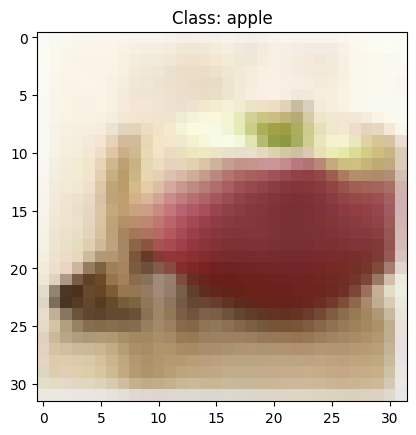

Sample input image class: boy


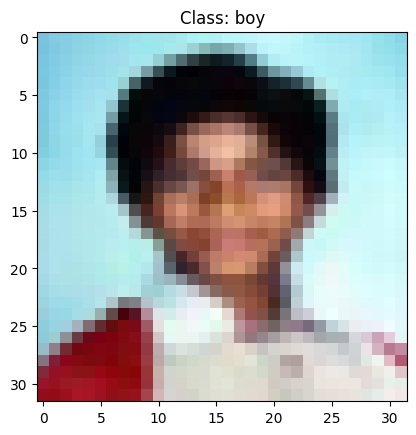

In [ ]:

Selected_Image = 2
image = input_X_train[Selected_Image]
print("Sample input image class:", cifar100_fine_labels[output_y_train[Selected_Image][0]])
plt.imshow(image)
plt.title(f"Class: {cifar100_fine_labels[output_y_train[Selected_Image][0]]}")
plt.show()

Selected_Image = 3
image = input_X_train[Selected_Image]
print("Sample input image class:", cifar100_fine_labels[output_y_train[Selected_Image][0]])
plt.imshow(image)
plt.title(f"Class: {cifar100_fine_labels[output_y_train[Selected_Image][0]]}")
plt.show()

# Training

In [ ]:
def identity_block(x, filters, dropout_rate):
    x_skip = x


    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization(momentum=0.9)(x)
    x = Activation('relu')(x)


    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization(momentum=0.9)(x)
    x = Dropout(dropout_rate)(x)


    x = Add()([x, x_skip])
    x = Activation('relu')(x)
    return x


In [ ]:
def conv_block(x, filters, stride, dropout_rate):
    x_skip = x


    x = Conv2D(filters, 3, strides=stride, padding='same')(x)
    x = BatchNormalization(momentum=0.9)(x)
    x = Activation('relu')(x)


    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization(momentum=0.9)(x)
    x = Dropout(dropout_rate)(x)


    x_skip = Conv2D(filters, 1, strides=stride, padding='same')(x_skip)
    x_skip = BatchNormalization(momentum=0.9)(x_skip)

    x = Add()([x, x_skip])
    x = Activation('relu')(x)
    return x


In [ ]:

inputs = Input(shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS))


x = Conv2D(64, 3, strides=1, padding='same')(inputs)
x = BatchNormalization(momentum=0.9)(x)
x = Activation('relu')(x)




x = conv_block(x, 64, stride=1, dropout_rate=0.3)
x = identity_block(x, 64, dropout_rate=0.3)


x = conv_block(x, 128, stride=2, dropout_rate=0.3)
x = identity_block(x, 128, dropout_rate=0.3)


x = conv_block(x, 256, stride=2, dropout_rate=0.3)
x = identity_block(x, 256, dropout_rate=0.3)


x = Dropout(0.2)(x)
x = GlobalAveragePooling2D()(x)
outputs = Dense(N_CLASSES, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
class TrainingMonitor(Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = K.get_value(self.model.optimizer.learning_rate)
        print(f"\nEpoch {epoch+1}")
        print(f"LR: {lr:.1e}\n")
        print(f"  Training Loss: {logs['loss']:.4f} - Training Accuracy: {logs['accuracy']:.4f}")
        print(f"  Validation Loss: {logs['val_loss']:.4f} - Validation Accuracy: {logs['val_accuracy']:.4f}")
        if logs['accuracy'] - logs['val_accuracy'] > 0.15:
            print(f"! Overfitting: {logs['accuracy']-logs['val_accuracy']:.4f} gap")



In [ ]:

lr_schedule = CosineDecay(
    initial_learning_rate=0.1,
    decay_steps=N_EPOCH * (len(input_X_train)//BATCH_SIZE),
    alpha=0.01
)

OPTIM1 = SGD(
    learning_rate=lr_schedule,
    momentum=0.9,
    nesterov=True,
)

model.compile(loss='categorical_crossentropy', optimizer=OPTIM1, metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 32, 32, 64)     │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 32, 32, 64)     │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 32, 32, 64)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 32, 32, 64)     │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 32, 32, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 32, 32, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 32, 32, 64)     │         36,928 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 32, 32, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 32, 32, 64)     │          4,160 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 32, 32, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 32, 32, 64)     │            256 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 32, 32, 64)     │              0 │ dropout[0][0],         │
│                           │                        │                │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 32, 32, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 64)     │         36,928 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 32, 32, 64)     │            256 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activat

 Total params: 2,811,940 (10.73 MB)

 Trainable params: 2,807,332 (10.71 MB)

 Non-trainable params: 4,608 (18.00 KB)

In [ ]:

early_stop = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=12,
    restore_best_weights=True,
    start_from_epoch=15
)

In [ ]:

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

In [ ]:
history = model.fit(
    input_X_train, output_Y_train,
    batch_size=BATCH_SIZE,
    epochs=N_EPOCH,
    validation_split=VALIDATION_SPLIT,
    verbose=VERBOSE,
    callbacks=[
        early_stop,
        checkpoint,
        TrainingMonitor(),
    ]
)


Epoch 1/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.0772 - loss: 4.1979
Epoch 1: val_accuracy improved from -inf to 0.10000, saving model to best_model.h5



Epoch 1
LR: 1.0e-01

  Training Loss: 3.8135 - Training Accuracy: 0.1202
  Validation Loss: 4.1036 - Validation Accuracy: 0.1000
157/157 ━━━━━━━━━━━━━━━━━━━━ 45s 132ms/step - accuracy: 0.0775 - loss: 4.1954 - val_accuracy: 0.1000 - val_loss: 4.1036
Epoch 2/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2165 - loss: 3.1661
Epoch 2: val_accuracy improved from 0.10000 to 0.23980, saving model to best_model.h5



Epoch 2
LR: 1.0e-01

  Training Loss: 3.0309 - Training Accuracy: 0.2426
  Validation Loss: 3.0726 - Validation Accuracy: 0.2398
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.2168 - loss: 3.1644 - val_accuracy: 0.2398 - val_loss: 3.0726
Epoch 3/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3309 - loss: 2.5753
Epoch 3: val_accuracy improved from 0.23980 to 0.26390, saving model to best_model.h5



Epoch 3
LR: 1.0e-01

  Training Loss: 2.5009 - Training Accuracy: 0.3447
  Validation Loss: 3.0915 - Validation Accuracy: 0.2639
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.3311 - loss: 2.5743 - val_accuracy: 0.2639 - val_loss: 3.0915
Epoch 4/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4148 - loss: 2.1730
Epoch 4: val_accuracy improved from 0.26390 to 0.34180, saving model to best_model.h5



Epoch 4
LR: 1.0e-01

  Training Loss: 2.1275 - Training Accuracy: 0.4250
  Validation Loss: 2.6669 - Validation Accuracy: 0.3418
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.4149 - loss: 2.1724 - val_accuracy: 0.3418 - val_loss: 2.6669
Epoch 5/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4827 - loss: 1.8844
Epoch 5: val_accuracy improved from 0.34180 to 0.36890, saving model to best_model.h5



Epoch 5
LR: 9.9e-02

  Training Loss: 1.8559 - Training Accuracy: 0.4882
  Validation Loss: 2.5829 - Validation Accuracy: 0.3689
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.4828 - loss: 1.8841 - val_accuracy: 0.3689 - val_loss: 2.5829
Epoch 6/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5350 - loss: 1.6575
Epoch 6: val_accuracy improved from 0.36890 to 0.41110, saving model to best_model.h5



Epoch 6
LR: 9.9e-02

  Training Loss: 1.6427 - Training Accuracy: 0.5361
  Validation Loss: 2.3328 - Validation Accuracy: 0.4111
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.5350 - loss: 1.6572 - val_accuracy: 0.4111 - val_loss: 2.3328
Epoch 7/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5813 - loss: 1.4658
Epoch 7: val_accuracy improved from 0.41110 to 0.46940, saving model to best_model.h5



Epoch 7
LR: 9.9e-02

  Training Loss: 1.4739 - Training Accuracy: 0.5806
  Validation Loss: 2.0393 - Validation Accuracy: 0.4694
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.5813 - loss: 1.4659 - val_accuracy: 0.4694 - val_loss: 2.0393
Epoch 8/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6179 - loss: 1.3191
Epoch 8: val_accuracy did not improve from 0.46940

Epoch 8
LR: 9.8e-02

  Training Loss: 1.3211 - Training Accuracy: 0.6176
  Validation Loss: 2.3214 - Validation Accuracy: 0.4320
! Overfitting: 0.1856 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.6179 - loss: 1.3192 - val_accuracy: 0.4320 - val_loss: 2.3214
Epoch 9/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6548 - loss: 1.1778
Epoch 9: val_accuracy improved from 0.46940 to 0.53020, saving model to best_model.h5



Epoch 9
LR: 9.8e-02

  Training Loss: 1.1823 - Training Accuracy: 0.6532
  Validation Loss: 1.7986 - Validation Accuracy: 0.5302
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.6548 - loss: 1.1779 - val_accuracy: 0.5302 - val_loss: 1.7986
Epoch 10/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6901 - loss: 1.0362
Epoch 10: val_accuracy did not improve from 0.53020

Epoch 10
LR: 9.7e-02

  Training Loss: 1.0514 - Training Accuracy: 0.6886
  Validation Loss: 1.9421 - Validation Accuracy: 0.5020
! Overfitting: 0.1866 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.6901 - loss: 1.0364 - val_accuracy: 0.5020 - val_loss: 1.9421
Epoch 11/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7246 - loss: 0.9162
Epoch 11: val_accuracy did not improve from 0.53020

Epoch 11
LR: 9.7e-02

  Training Loss: 0.9367 - Training Accuracy: 0.7191
  Validation Loss: 1.8321 - Validation Accuracy: 0.5298
! Overfitting: 0.1893 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/ste


Epoch 14
LR: 9.5e-02

  Training Loss: 0.6373 - Training Accuracy: 0.8010
  Validation Loss: 1.9348 - Validation Accuracy: 0.5494
! Overfitting: 0.2516 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8095 - loss: 0.6125 - val_accuracy: 0.5494 - val_loss: 1.9348
Epoch 15/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8352 - loss: 0.5227
Epoch 15: val_accuracy improved from 0.54940 to 0.57260, saving model to best_model.h5



Epoch 15
LR: 9.4e-02

  Training Loss: 0.5445 - Training Accuracy: 0.8280
  Validation Loss: 1.8426 - Validation Accuracy: 0.5726
! Overfitting: 0.2554 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8350 - loss: 0.5231 - val_accuracy: 0.5726 - val_loss: 1.8426
Epoch 16/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8608 - loss: 0.4351
Epoch 16: val_accuracy did not improve from 0.57260

Epoch 16
LR: 9.3e-02

  Training Loss: 0.4607 - Training Accuracy: 0.8518
  Validation Loss: 2.3878 - Validation Accuracy: 0.5104
! Overfitting: 0.3414 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.8606 - loss: 0.4356 - val_accuracy: 0.5104 - val_loss: 2.3878
Epoch 17/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8724 - loss: 0.4003
Epoch 17: val_accuracy improved from 0.57260 to 0.57270, saving model to best_model.h5



Epoch 17
LR: 9.2e-02

  Training Loss: 0.4104 - Training Accuracy: 0.8688
  Validation Loss: 1.9818 - Validation Accuracy: 0.5727
! Overfitting: 0.2961 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8723 - loss: 0.4005 - val_accuracy: 0.5727 - val_loss: 1.9818
Epoch 18/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8970 - loss: 0.3234
Epoch 18: val_accuracy did not improve from 0.57270

Epoch 18
LR: 9.1e-02

  Training Loss: 0.3416 - Training Accuracy: 0.8899
  Validation Loss: 2.2897 - Validation Accuracy: 0.5443
! Overfitting: 0.3456 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.8970 - loss: 0.3235 - val_accuracy: 0.5443 - val_loss: 2.2897
Epoch 19/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9083 - loss: 0.2886
Epoch 19: val_accuracy did not improve from 0.57270

Epoch 19
LR: 9.0e-02

  Training Loss: 0.2995 - Training Accuracy: 0.9047
  Validation Loss: 2.1623 - Validation Accuracy: 0.5503
! Overfitting: 0.3544 gap
157/157 ━━━━━


Epoch 25
LR: 8.3e-02

  Training Loss: 0.1243 - Training Accuracy: 0.9614
  Validation Loss: 2.2871 - Validation Accuracy: 0.5831
! Overfitting: 0.3783 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9620 - loss: 0.1230 - val_accuracy: 0.5831 - val_loss: 2.2871
Epoch 26/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9707 - loss: 0.1017
Epoch 26: val_accuracy improved from 0.58310 to 0.59730, saving model to best_model.h5



Epoch 26
LR: 8.2e-02

  Training Loss: 0.0998 - Training Accuracy: 0.9714
  Validation Loss: 2.1784 - Validation Accuracy: 0.5973
! Overfitting: 0.3741 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9707 - loss: 0.1017 - val_accuracy: 0.5973 - val_loss: 2.1784
Epoch 27/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9738 - loss: 0.0865
Epoch 27: val_accuracy improved from 0.59730 to 0.59920, saving model to best_model.h5



Epoch 27
LR: 8.1e-02

  Training Loss: 0.0906 - Training Accuracy: 0.9725
  Validation Loss: 2.2841 - Validation Accuracy: 0.5992
! Overfitting: 0.3733 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9738 - loss: 0.0865 - val_accuracy: 0.5992 - val_loss: 2.2841
Epoch 28/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9793 - loss: 0.0770
Epoch 28: val_accuracy did not improve from 0.59920

Epoch 28
LR: 8.0e-02

  Training Loss: 0.0760 - Training Accuracy: 0.9786
  Validation Loss: 2.3614 - Validation Accuracy: 0.5925
! Overfitting: 0.3861 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9792 - loss: 0.0770 - val_accuracy: 0.5925 - val_loss: 2.3614
Epoch 29/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9785 - loss: 0.0714
Epoch 29: val_accuracy did not improve from 0.59920

Epoch 29
LR: 7.8e-02

  Training Loss: 0.0712 - Training Accuracy: 0.9788
  Validation Loss: 2.2602 - Validation Accuracy: 0.5934
! Overfitting: 0.3854 gap
157/157 ━━━━━


Epoch 30
LR: 7.7e-02

  Training Loss: 0.0605 - Training Accuracy: 0.9823
  Validation Loss: 2.3305 - Validation Accuracy: 0.6011
! Overfitting: 0.3812 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9815 - loss: 0.0621 - val_accuracy: 0.6011 - val_loss: 2.3305
Epoch 31/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9844 - loss: 0.0575
Epoch 31: val_accuracy improved from 0.60110 to 0.60480, saving model to best_model.h5



Epoch 31
LR: 7.5e-02

  Training Loss: 0.0569 - Training Accuracy: 0.9838
  Validation Loss: 2.3594 - Validation Accuracy: 0.6048
! Overfitting: 0.3790 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9844 - loss: 0.0575 - val_accuracy: 0.6048 - val_loss: 2.3594
Epoch 32/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9856 - loss: 0.0485
Epoch 32: val_accuracy did not improve from 0.60480

Epoch 32
LR: 7.4e-02

  Training Loss: 0.0476 - Training Accuracy: 0.9863
  Validation Loss: 2.3589 - Validation Accuracy: 0.5963
! Overfitting: 0.3900 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9856 - loss: 0.0485 - val_accuracy: 0.5963 - val_loss: 2.3589
Epoch 33/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9868 - loss: 0.0474
Epoch 33: val_accuracy improved from 0.60480 to 0.60540, saving model to best_model.h5



Epoch 33
LR: 7.2e-02

  Training Loss: 0.0467 - Training Accuracy: 0.9866
  Validation Loss: 2.3408 - Validation Accuracy: 0.6054
! Overfitting: 0.3812 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9868 - loss: 0.0474 - val_accuracy: 0.6054 - val_loss: 2.3408
Epoch 34/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9891 - loss: 0.0394
Epoch 34: val_accuracy improved from 0.60540 to 0.60940, saving model to best_model.h5



Epoch 34
LR: 7.1e-02

  Training Loss: 0.0362 - Training Accuracy: 0.9907
  Validation Loss: 2.3073 - Validation Accuracy: 0.6094
! Overfitting: 0.3813 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9892 - loss: 0.0393 - val_accuracy: 0.6094 - val_loss: 2.3073
Epoch 35/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9923 - loss: 0.0294
Epoch 35: val_accuracy improved from 0.60940 to 0.61720, saving model to best_model.h5



Epoch 35
LR: 6.9e-02

  Training Loss: 0.0310 - Training Accuracy: 0.9919
  Validation Loss: 2.2810 - Validation Accuracy: 0.6172
! Overfitting: 0.3747 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9923 - loss: 0.0294 - val_accuracy: 0.6172 - val_loss: 2.2810
Epoch 36/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9919 - loss: 0.0316
Epoch 36: val_accuracy did not improve from 0.61720

Epoch 36
LR: 6.8e-02

  Training Loss: 0.0323 - Training Accuracy: 0.9918
  Validation Loss: 2.3817 - Validation Accuracy: 0.6092
! Overfitting: 0.3826 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9919 - loss: 0.0316 - val_accuracy: 0.6092 - val_loss: 2.3817
Epoch 37/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9936 - loss: 0.0269
Epoch 37: val_accuracy did not improve from 0.61720

Epoch 37
LR: 6.6e-02

  Training Loss: 0.0285 - Training Accuracy: 0.9929
  Validation Loss: 2.4061 - Validation Accuracy: 0.6088
! Overfitting: 0.3841 gap
157/157 ━━━━━


Epoch 40
LR: 6.1e-02

  Training Loss: 0.0192 - Training Accuracy: 0.9954
  Validation Loss: 2.3440 - Validation Accuracy: 0.6189
! Overfitting: 0.3765 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9955 - loss: 0.0188 - val_accuracy: 0.6189 - val_loss: 2.3440
Epoch 41/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9965 - loss: 0.0159
Epoch 41: val_accuracy improved from 0.61890 to 0.62470, saving model to best_model.h5



Epoch 41
LR: 6.0e-02

  Training Loss: 0.0166 - Training Accuracy: 0.9961
  Validation Loss: 2.3475 - Validation Accuracy: 0.6247
! Overfitting: 0.3714 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9965 - loss: 0.0159 - val_accuracy: 0.6247 - val_loss: 2.3475
Epoch 42/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9964 - loss: 0.0160
Epoch 42: val_accuracy improved from 0.62470 to 0.62510, saving model to best_model.h5



Epoch 42
LR: 5.8e-02

  Training Loss: 0.0139 - Training Accuracy: 0.9970
  Validation Loss: 2.3402 - Validation Accuracy: 0.6251
! Overfitting: 0.3719 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9965 - loss: 0.0160 - val_accuracy: 0.6251 - val_loss: 2.3402
Epoch 43/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9972 - loss: 0.0141
Epoch 43: val_accuracy did not improve from 0.62510

Epoch 43
LR: 5.6e-02

  Training Loss: 0.0137 - Training Accuracy: 0.9973
  Validation Loss: 2.3470 - Validation Accuracy: 0.6229
! Overfitting: 0.3744 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9972 - loss: 0.0141 - val_accuracy: 0.6229 - val_loss: 2.3470
Epoch 44/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9970 - loss: 0.0136
Epoch 44: val_accuracy did not improve from 0.62510

Epoch 44
LR: 5.5e-02

  Training Loss: 0.0138 - Training Accuracy: 0.9969
  Validation Loss: 2.3406 - Validation Accuracy: 0.6236
! Overfitting: 0.3733 gap
157/157 ━━━━━


Epoch 45
LR: 5.3e-02

  Training Loss: 0.0124 - Training Accuracy: 0.9977
  Validation Loss: 2.3430 - Validation Accuracy: 0.6277
! Overfitting: 0.3700 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9974 - loss: 0.0137 - val_accuracy: 0.6277 - val_loss: 2.3430
Epoch 46/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9978 - loss: 0.0102
Epoch 46: val_accuracy did not improve from 0.62770

Epoch 46
LR: 5.1e-02

  Training Loss: 0.0099 - Training Accuracy: 0.9981
  Validation Loss: 2.3159 - Validation Accuracy: 0.6271
! Overfitting: 0.3710 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9978 - loss: 0.0102 - val_accuracy: 0.6271 - val_loss: 2.3159
Epoch 47/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9979 - loss: 0.0106
Epoch 47: val_accuracy improved from 0.62770 to 0.62800, saving model to best_model.h5



Epoch 47
LR: 5.0e-02

  Training Loss: 0.0100 - Training Accuracy: 0.9981
  Validation Loss: 2.3505 - Validation Accuracy: 0.6280
! Overfitting: 0.3701 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9979 - loss: 0.0106 - val_accuracy: 0.6280 - val_loss: 2.3505
Epoch 48/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9983 - loss: 0.0085
Epoch 48: val_accuracy did not improve from 0.62800

Epoch 48
LR: 4.8e-02

  Training Loss: 0.0089 - Training Accuracy: 0.9983
  Validation Loss: 2.3512 - Validation Accuracy: 0.6250
! Overfitting: 0.3733 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9983 - loss: 0.0085 - val_accuracy: 0.6250 - val_loss: 2.3512
Epoch 49/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9986 - loss: 0.0078
Epoch 49: val_accuracy improved from 0.62800 to 0.62950, saving model to best_model.h5



Epoch 49
LR: 4.6e-02

  Training Loss: 0.0080 - Training Accuracy: 0.9986
  Validation Loss: 2.3297 - Validation Accuracy: 0.6295
! Overfitting: 0.3691 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9986 - loss: 0.0078 - val_accuracy: 0.6295 - val_loss: 2.3297
Epoch 50/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9989 - loss: 0.0072
Epoch 50: val_accuracy improved from 0.62950 to 0.63120, saving model to best_model.h5



Epoch 50
LR: 4.5e-02

  Training Loss: 0.0072 - Training Accuracy: 0.9989
  Validation Loss: 2.3469 - Validation Accuracy: 0.6312
! Overfitting: 0.3677 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9989 - loss: 0.0072 - val_accuracy: 0.6312 - val_loss: 2.3469
Epoch 51/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9988 - loss: 0.0066
Epoch 51: val_accuracy did not improve from 0.63120

Epoch 51
LR: 4.3e-02

  Training Loss: 0.0072 - Training Accuracy: 0.9987
  Validation Loss: 2.3877 - Validation Accuracy: 0.6243
! Overfitting: 0.3744 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9988 - loss: 0.0067 - val_accuracy: 0.6243 - val_loss: 2.3877
Epoch 52/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9990 - loss: 0.0066
Epoch 52: val_accuracy did not improve from 0.63120

Epoch 52
LR: 4.1e-02

  Training Loss: 0.0063 - Training Accuracy: 0.9990
  Validation Loss: 2.3435 - Validation Accuracy: 0.6295
! Overfitting: 0.3695 gap
157/157 ━━━━━


Epoch 61
LR: 2.7e-02

  Training Loss: 0.0044 - Training Accuracy: 0.9993
  Validation Loss: 2.3589 - Validation Accuracy: 0.6319
! Overfitting: 0.3674 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9992 - loss: 0.0046 - val_accuracy: 0.6319 - val_loss: 2.3589
Epoch 62/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9996 - loss: 0.0038
Epoch 62: val_accuracy did not improve from 0.63190

Epoch 62
LR: 2.6e-02

  Training Loss: 0.0037 - Training Accuracy: 0.9996
  Validation Loss: 2.3725 - Validation Accuracy: 0.6317
! Overfitting: 0.3679 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9996 - loss: 0.0038 - val_accuracy: 0.6317 - val_loss: 2.3725
Epoch 63/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9994 - loss: 0.0044
Epoch 63: val_accuracy improved from 0.63190 to 0.63300, saving model to best_model.h5



Epoch 63
LR: 2.4e-02

  Training Loss: 0.0045 - Training Accuracy: 0.9994
  Validation Loss: 2.3529 - Validation Accuracy: 0.6330
! Overfitting: 0.3664 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9994 - loss: 0.0044 - val_accuracy: 0.6330 - val_loss: 2.3529
Epoch 64/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9997 - loss: 0.0031
Epoch 64: val_accuracy improved from 0.63300 to 0.63380, saving model to best_model.h5



Epoch 64
LR: 2.3e-02

  Training Loss: 0.0034 - Training Accuracy: 0.9996
  Validation Loss: 2.3787 - Validation Accuracy: 0.6338
! Overfitting: 0.3658 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9997 - loss: 0.0031 - val_accuracy: 0.6338 - val_loss: 2.3787
Epoch 65/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9996 - loss: 0.0038
Epoch 65: val_accuracy did not improve from 0.63380

Epoch 65
LR: 2.2e-02

  Training Loss: 0.0035 - Training Accuracy: 0.9996
  Validation Loss: 2.3748 - Validation Accuracy: 0.6322
! Overfitting: 0.3674 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9996 - loss: 0.0038 - val_accuracy: 0.6322 - val_loss: 2.3748
Epoch 66/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9995 - loss: 0.0040
Epoch 66: val_accuracy did not improve from 0.63380

Epoch 66
LR: 2.0e-02

  Training Loss: 0.0038 - Training Accuracy: 0.9995
  Validation Loss: 2.3803 - Validation Accuracy: 0.6318
! Overfitting: 0.3677 gap
157/157 ━━━━━


Epoch 68
LR: 1.8e-02

  Training Loss: 0.0031 - Training Accuracy: 0.9996
  Validation Loss: 2.3578 - Validation Accuracy: 0.6344
! Overfitting: 0.3652 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9998 - loss: 0.0028 - val_accuracy: 0.6344 - val_loss: 2.3578
Epoch 69/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9996 - loss: 0.0029
Epoch 69: val_accuracy improved from 0.63440 to 0.63540, saving model to best_model.h5



Epoch 69
LR: 1.7e-02

  Training Loss: 0.0031 - Training Accuracy: 0.9995
  Validation Loss: 2.3627 - Validation Accuracy: 0.6354
! Overfitting: 0.3641 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9996 - loss: 0.0029 - val_accuracy: 0.6354 - val_loss: 2.3627
Epoch 70/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9996 - loss: 0.0032
Epoch 70: val_accuracy did not improve from 0.63540

Epoch 70
LR: 1.5e-02

  Training Loss: 0.0030 - Training Accuracy: 0.9997
  Validation Loss: 2.3640 - Validation Accuracy: 0.6338
! Overfitting: 0.3659 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9996 - loss: 0.0032 - val_accuracy: 0.6338 - val_loss: 2.3640
Epoch 71/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9996 - loss: 0.0031
Epoch 71: val_accuracy did not improve from 0.63540

Epoch 71
LR: 1.4e-02

  Training Loss: 0.0031 - Training Accuracy: 0.9996
  Validation Loss: 2.3718 - Validation Accuracy: 0.6329
! Overfitting: 0.3667 gap
157/157 ━━━━━

In [ ]:

predictions = model.predict(input_X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(output_Y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


## Evaluation

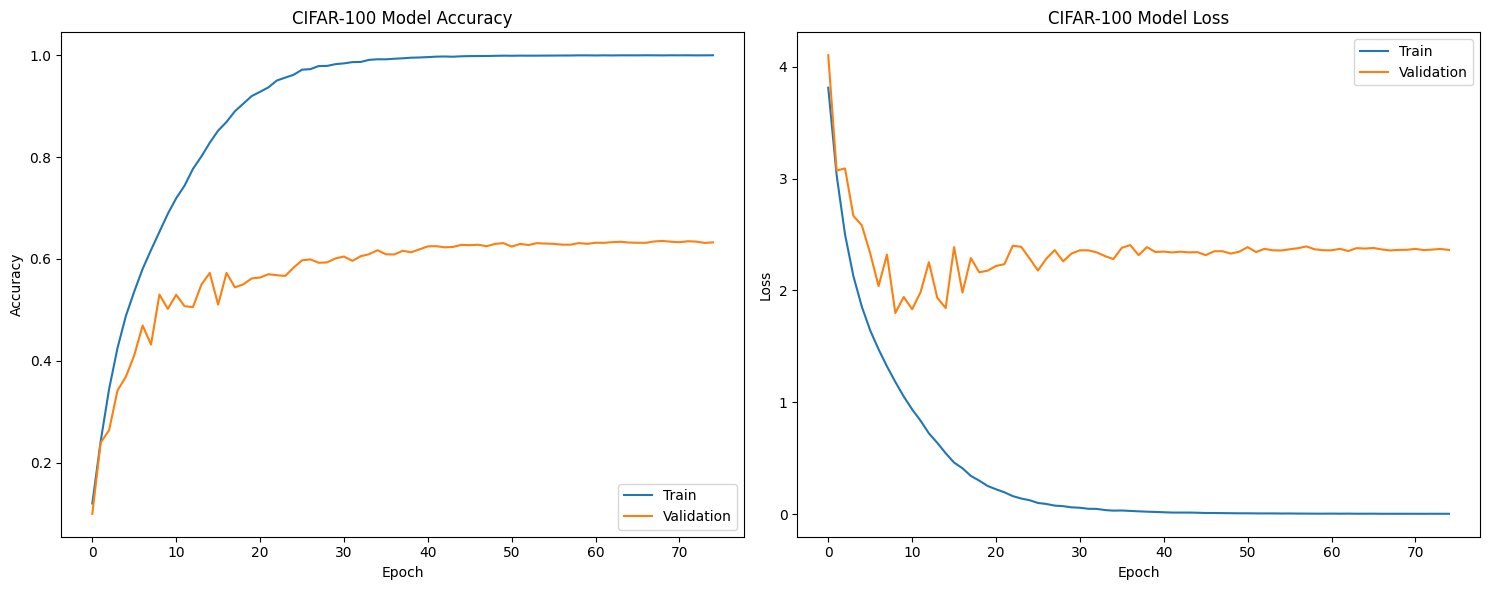

In [ ]:


plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CIFAR-100 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CIFAR-100 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:


test_loss, test_accuracy = model.evaluate(input_X_test, output_Y_test, verbose=VERBOSE)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


superclass_y_true = np.array([fine_to_coarse_mapping[y] for y in y_true])
superclass_y_pred = np.array([fine_to_coarse_mapping[y] for y in y_pred])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6412 - loss: 2.4106

Test Loss: 2.3959
Test Accuracy: 0.6378
